In [1]:
%matplotlib inline

from database.DataBaseModels import *

import pygal
import operator
import networkx as nx

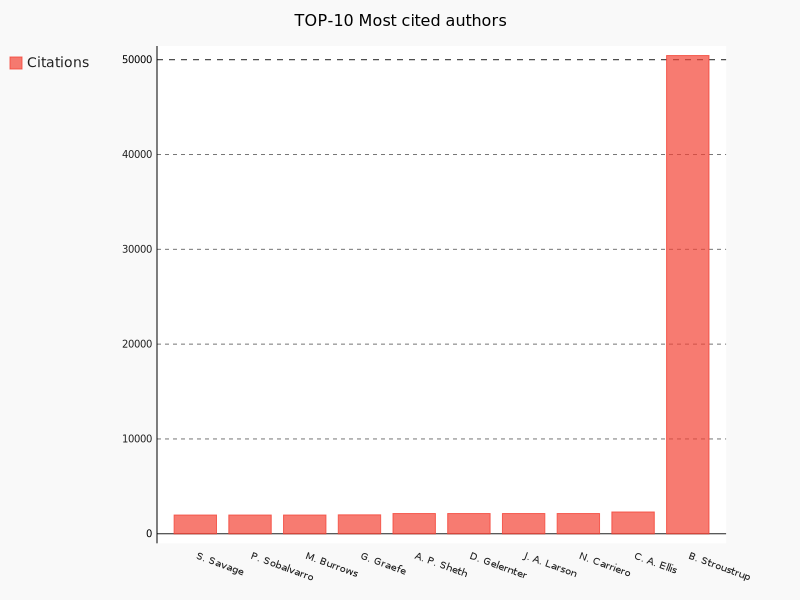

In [2]:
authors_list = [author for author in reversed(db.Author.select().order_by(desc(db.Author.citations_counter))[:10])]
authors_name = []

for author in authors_list:
    result = ''
    name = author.name.split(' ')
    for word in name:
        if word != name[-1]:
            result += '{0}. '.format(word[0])
        else:
            result += word
    authors_name.append(result)

chart = pygal.Bar(x_label_rotation=20)

chart.add('Citations', [author.citations_counter for author in authors_list])
chart.title = 'TOP-10 Most cited authors'
chart.x_labels = authors_name
# chart.render_in_browser()
chart.render_to_png('visualization/top10_most_cited_authors')
chart

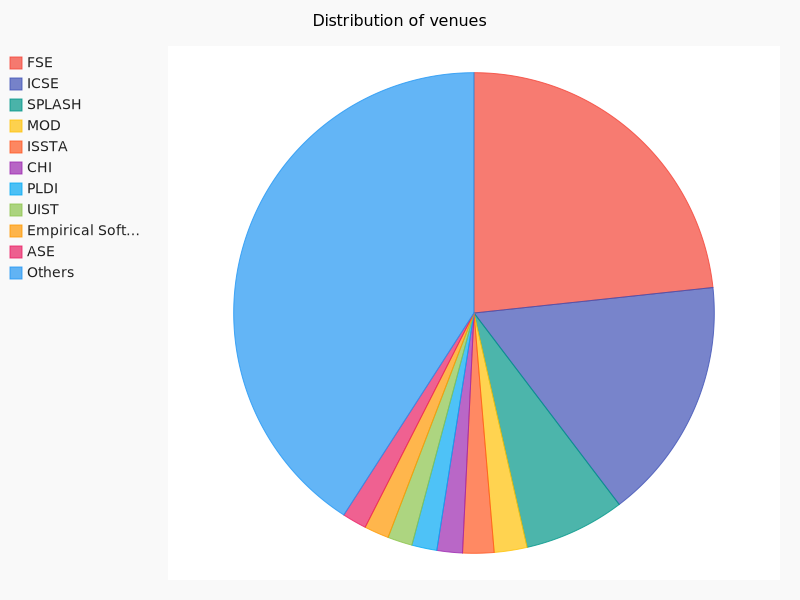

In [10]:
BORDER = 10

venue_dict = {}
chart = pygal.Pie()

for article in db.Article.select():
    if article.venue_id not in venue_dict.keys():
        venue_dict[article.venue_id] = 1
    else:
        venue_dict[article.venue_id] += 1

sorted_tuples = sorted(venue_dict.items(), key=operator.itemgetter(1), reverse=True)[1:]
del sorted_tuples[2]

for pair in sorted_tuples[:BORDER]:
    chart.add(pair[0].name, pair[1]/len(db.Article.select()))
chart.title = 'Distribution of venues'
chart.add('Others', sum([pair[1] for pair in sorted_tuples[BORDER:]])/len(db.Article.select()))
# chart.render_in_browser()
chart.render_to_png('visualization/distribution_of_venues')
chart

In [4]:
total_citation_counter = 0

for author in db.Author.select():
    total_citation_counter += author.citations_counter

print('Average number of citations per author: {0}'.format(total_citation_counter/len(db.Author.select())))

Average number of citations per author: 43.81401154626307


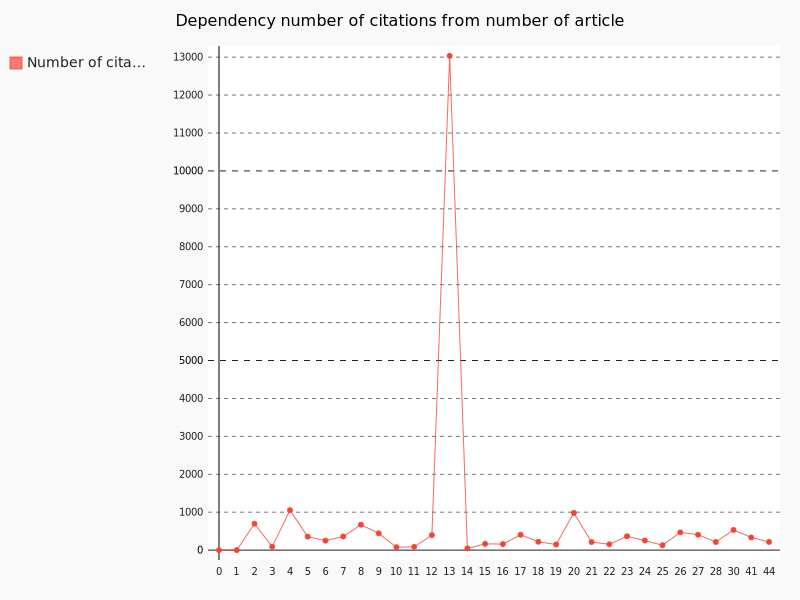

In [9]:
def get_number_of_articles(author):
    return len(author.author__author_article)

mapping = {}

for author in db.Author.select():
    number_of_article = get_number_of_articles(author)
    if number_of_article not in mapping.keys():
        mapping[number_of_article] = author.citations_counter
    else:
        mapping[number_of_article] = (mapping[number_of_article] + author.citations_counter) // 2

chart = pygal.Line()
chart.title = 'Dependency number of citations from number of article'
chart.x_labels = map(str, mapping.keys())
chart.add('Number of citations',mapping.values())

# chart.render_in_browser()
chart.render_to_png('visualization/number_of_citations_from_number_of_article.png')
chart

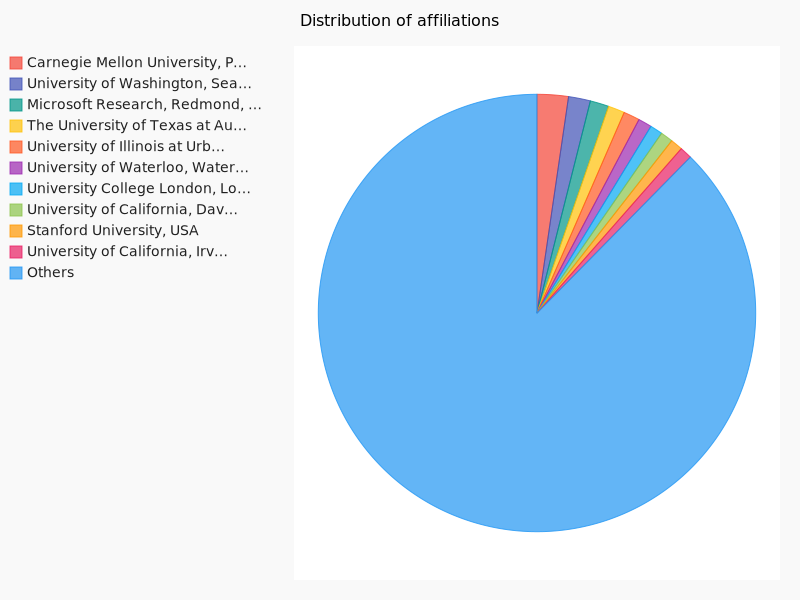

In [50]:
BORDER = 10
affiliations_counter = {}
chart = pygal.Pie(truncate_legend=30)

for affiliation in db.Affiliation.select():
    affiliations_counter[affiliation] = len(affiliation.affiliation__author_article)

chart.title = 'Distribution of affiliations'
for pair in sorted(affiliations_counter.items(), key=operator.itemgetter(1), reverse=True)[:BORDER]:
    chart.add(pair[0].name, pair[1]/sum([len(affiliation.affiliation__author_article) for affiliation in db.Affiliation.select()]))
chart.add('Others', sum([pair[1] for pair in sorted(affiliations_counter.items(), key=operator.itemgetter(1), reverse=True)[BORDER:]])/sum([len(affiliation.affiliation__author_article) for affiliation in db.Affiliation.select()]))    

chart.render_to_png('visualization/Distribution_of_affiliations.png')
# chart.render_in_browser()
chart